In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

There are 891 rows and 12 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 5 object type variable in the dataset.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin has null values

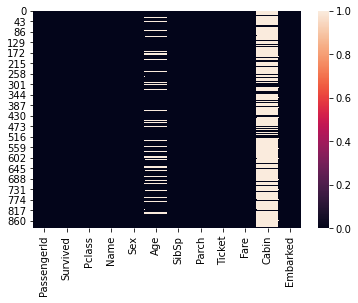

In [7]:
sn.heatmap(df.isnull())
plt.show()

Cabin variable has a lot of missing values.

also Age variable and embarked has also some nan values

In [8]:
# How many kinds of ticket are there?
df.Ticket.value_counts()

CA. 2343             7
1601                 7
347082               7
3101295              6
347088               6
                    ..
STON/O 2. 3101288    1
2649                 1
363592               1
SW/PP 751            1
2687                 1
Name: Ticket, Length: 681, dtype: int64

In [9]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(df.Ticket.unique())))

There are 681 unique Ticket values.


In [11]:
#droping Cabin,Name,Ticket, PassengerID(it has all unique value)
df.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace= True)

In [13]:
#As there are 177 Nan values in Age, however replacing this data with anything may effect out prediction, so we are going to drop them
df.dropna(inplace=True)

In [14]:
df.shape

(712, 8)

In [15]:
#checking for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [17]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


# Converting object variable using labelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Sex and Embarked are object data type
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [21]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


In label Sex(Female=0, Male=1)

In Embarked(s=2,c=0,q=1)

# Checking for Coorelation

<AxesSubplot:>

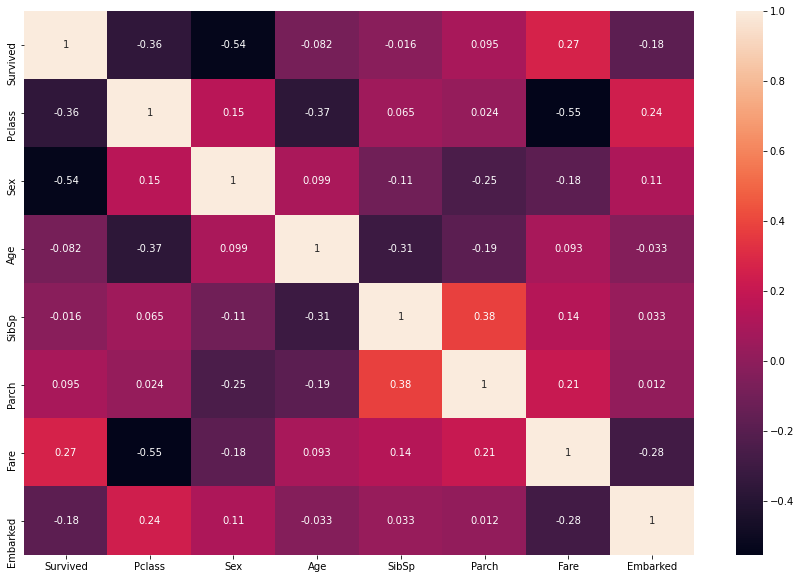

In [54]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True)

# EDA

# Univariate Analysis

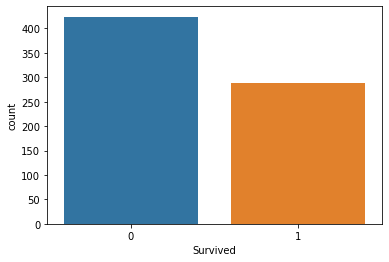

In [22]:
# making a countplot for"Survived" column
sn.countplot(df['Survived']);

Countplot of survived and not survived.

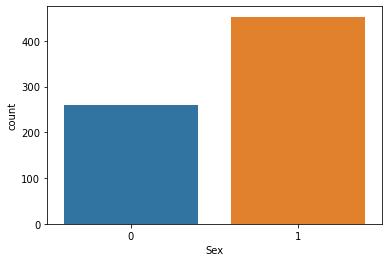

In [23]:
# making a countplot for "Sex" column
sn.countplot(df['Sex']);

<AxesSubplot:xlabel='Survived', ylabel='Density'>

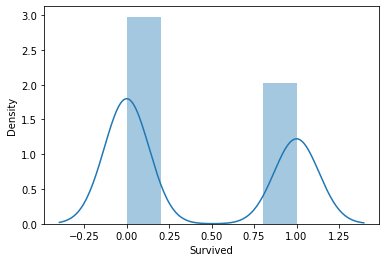

In [25]:
#plotting distplot
sn.distplot(df["Survived"])

It shows that nearly twice number of people didnt survive in the accident comparing to those who survived.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

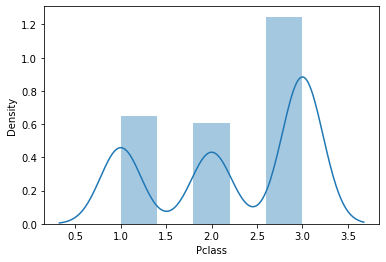

In [26]:
sn.distplot(df["Pclass"])

The passengers in 3rd class was highest. while the 1st and 2nd class was somewhere similar in numbers.

<AxesSubplot:xlabel='Sex', ylabel='Density'>

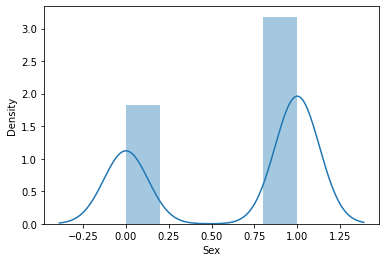

In [27]:
sn.distplot(df["Sex"])

There were more man in comparison to women.(approx double).

<AxesSubplot:xlabel='Age', ylabel='Density'>

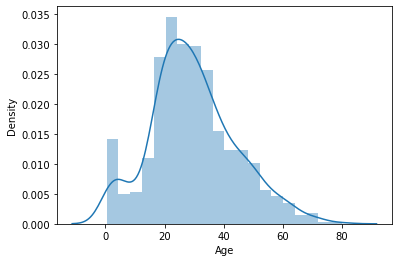

In [28]:
sn.distplot(df["Age"])

The maximum number of people were age group of 20-35. also there were alot of kids onboard also

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

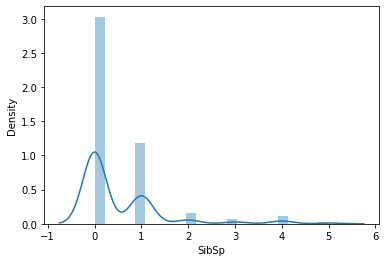

In [29]:
sn.distplot(df["SibSp"])

Majority of people were traveling alone.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

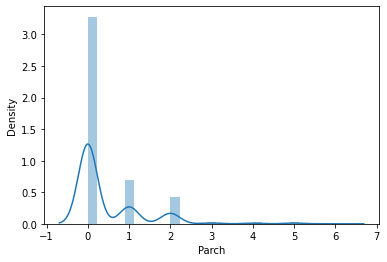

In [30]:
sn.distplot(df["Parch"])

Majority of people were traveling with no parents/children.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

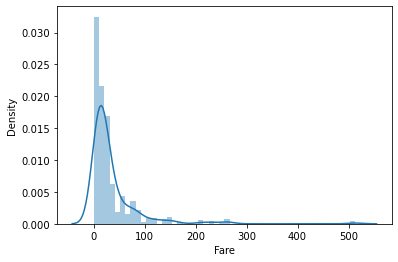

In [31]:
sn.distplot(df["Fare"])

Majortiy of the fares charged were between 0 and 50. however the maximum fare paid is 500.

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

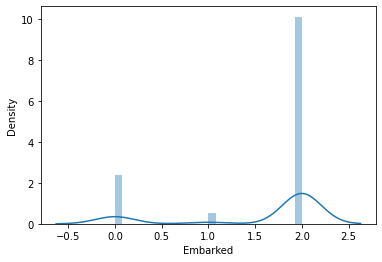

In [32]:
sn.distplot(df["Embarked"])

From the people onboard alot of people were from Southampton.

# Bivariate analysis

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

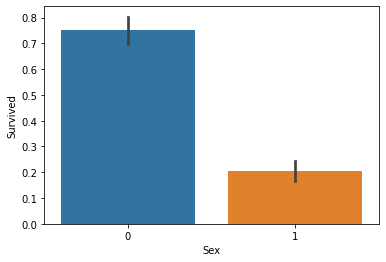

In [33]:
#Sex/Survived
sn.barplot(x="Sex",y="Survived", data=df)

The survival rate of women was approx more than thrice.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

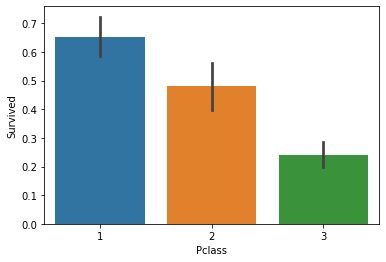

In [34]:
#Pclass/Survived
sn.barplot(x="Pclass",y="Survived", data=df)

A large number of passenger from class 1 survived. however class3 has least survival rate.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

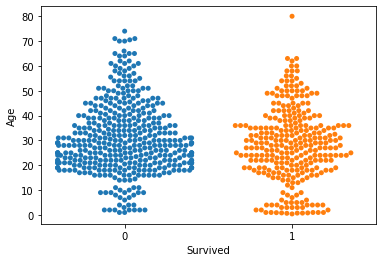

In [40]:
#Age/Survived
sn.swarmplot(x="Survived",y="Age", data=df)

graph shows that there were similarity in the age of both who died or survived.

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

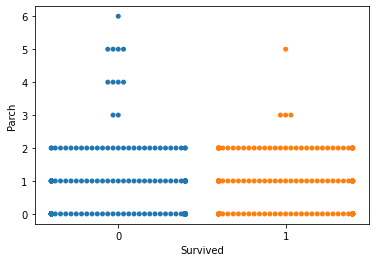

In [41]:
sn.swarmplot(x="Survived",y="Parch", data=df)

the people with 6,4 number of parents/children aboard the Titanic has no survival rate.

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

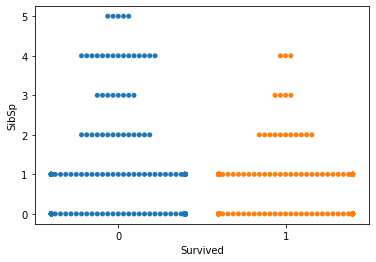

In [42]:
sn.swarmplot(x="Survived",y="SibSp", data=df)

the people with 5 number of siblings/spouses aboard the Titanic has no survival rate.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

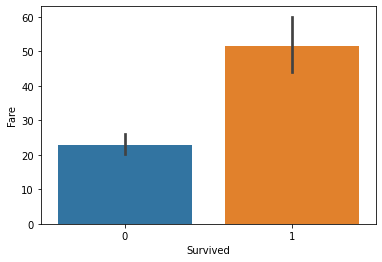

In [43]:
sn.barplot(x="Survived",y="Fare", data=df)

the people with who paid less fare has less survival rate.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

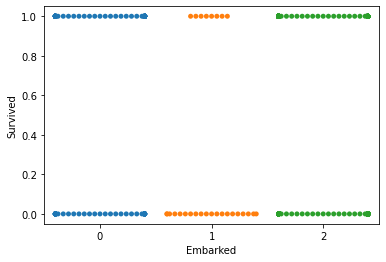

In [44]:
sn.swarmplot(x="Embarked",y="Survived", data=df)

The survival rate of people from Queenstown is less in comparison to others.

# Multivariate Analysis

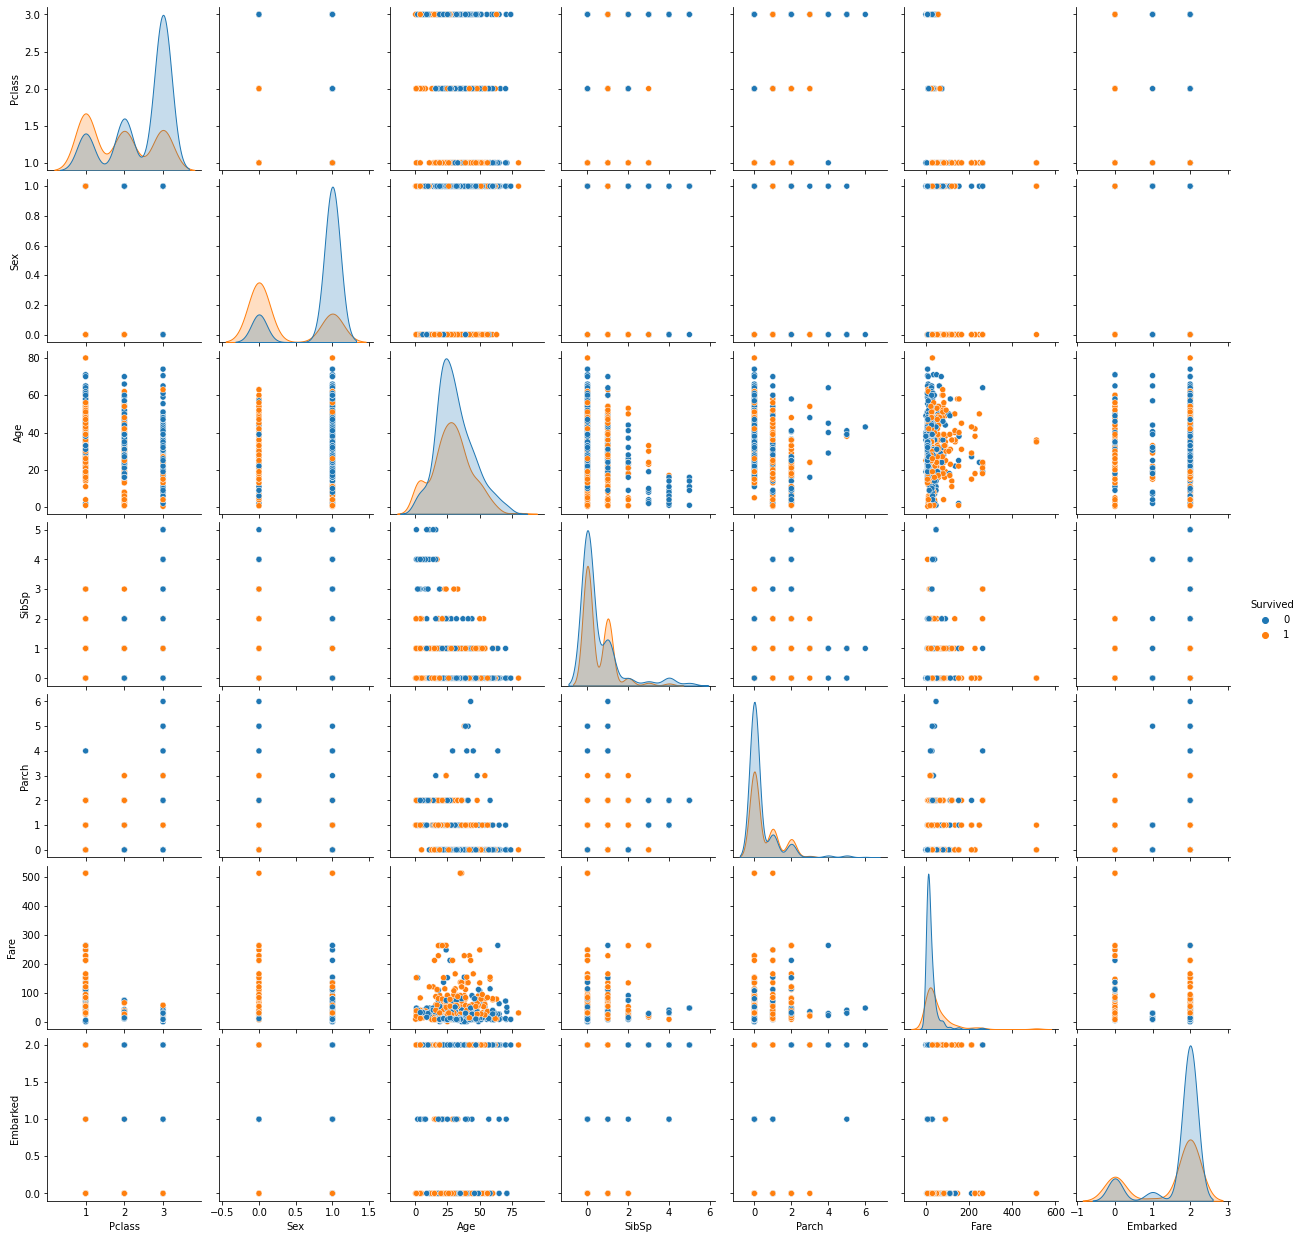

In [45]:
sn.pairplot(df,hue="Survived")

# Checking for outliers

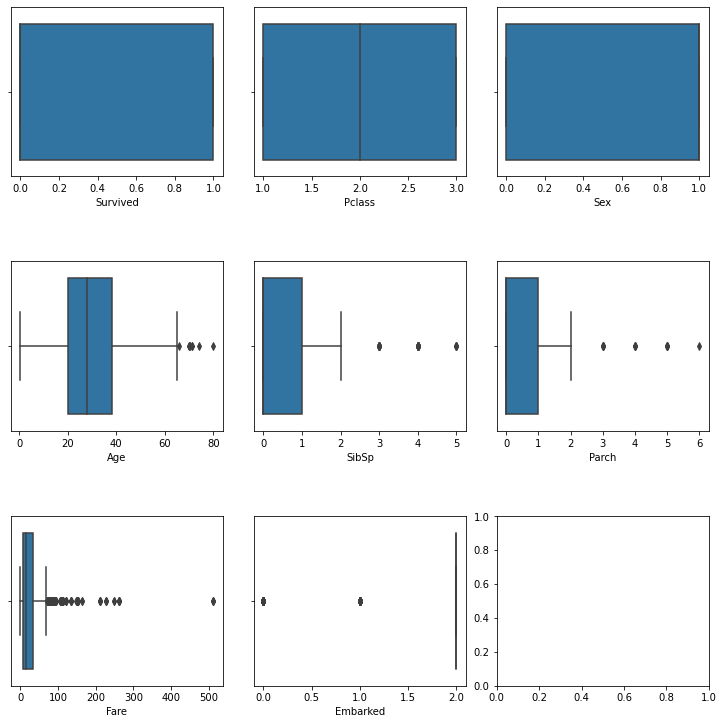

In [46]:
#ploting boxtplot
fig, ax=plt.subplots(ncols=3,nrows=3, figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Skewness

In [47]:
df.skew()

Survived    0.390010
Pclass     -0.475604
Sex        -0.567570
Age         0.388881
SibSp       2.515107
Parch       2.614177
Fare        4.667009
Embarked   -1.483389
dtype: float64

In [48]:
x=df.drop("Survived",axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [49]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [50]:
# To remove the skewness we use power transform 
from sklearn.preprocessing import power_transform

In [51]:
df_new=power_transform(x)

In [52]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [53]:
df_new.skew()

Pclass     -0.329527
Sex        -0.567570
Age        -0.026801
SibSp       0.701947
Parch       1.039736
Fare       -0.053393
Embarked   -1.360941
dtype: float64

In [55]:
#Importing liabraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

# Spiliting the data into input and target variable

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=65)

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((498, 7), (498,), (214, 7), (214,))

In [58]:
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

In [59]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.75      0.91      0.82       121
           1       0.84      0.60      0.70        93

    accuracy                           0.78       214
   macro avg       0.79      0.76      0.76       214
weighted avg       0.79      0.78      0.77       214

The accuracy score is:  0.7757009345794392
The confusion matrix is:
    
     [[110  11]
 [ 37  56]]


In [60]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.7949867034374076


In [61]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.76      0.88      0.82       121
           1       0.81      0.65      0.72        93

    accuracy                           0.78       214
   macro avg       0.79      0.76      0.77       214
weighted avg       0.78      0.78      0.78       214

The accuracy score is:  0.780373831775701
The confusion matrix is:
    
     [[107  14]
 [ 33  60]]


In [62]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.7640992810006895


In [63]:
#SVC
model(SVC)

The classification report is:
                   precision    recall  f1-score   support

           0       0.62      0.89      0.73       121
           1       0.67      0.28      0.39        93

    accuracy                           0.63       214
   macro avg       0.64      0.59      0.56       214
weighted avg       0.64      0.63      0.58       214

The accuracy score is:  0.6261682242990654
The confusion matrix is:
    
     [[108  13]
 [ 67  26]]


In [64]:
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.6700285629863094


In [65]:
#Naive Bayes
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.78      0.81      0.79       121
           1       0.74      0.70      0.72        93

    accuracy                           0.76       214
   macro avg       0.76      0.75      0.76       214
weighted avg       0.76      0.76      0.76       214

The accuracy score is:  0.7616822429906542
The confusion matrix is:
    
     [[98 23]
 [28 65]]


In [66]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.7865556978233034


In [67]:
#KNeighborsClassifier
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.68      0.80      0.74       121
           1       0.67      0.52      0.58        93

    accuracy                           0.68       214
   macro avg       0.67      0.66      0.66       214
weighted avg       0.68      0.68      0.67       214

The accuracy score is:  0.677570093457944
The confusion matrix is:
    
     [[97 24]
 [45 48]]


In [68]:
print(cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean())

0.6799369644440066


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
#LogisticRegression)
model(LogisticRegression)

The classification report is:
                   precision    recall  f1-score   support

           0       0.76      0.87      0.81       121
           1       0.79      0.65      0.71        93

    accuracy                           0.77       214
   macro avg       0.78      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214

The accuracy score is:  0.7710280373831776
The confusion matrix is:
    
     [[105  16]
 [ 33  60]]


In [71]:
print(cross_val_score(LogisticRegression(),x,y,cv=5).mean())

0.792140254112085


# Random Forest Classifier is the best Model.

# Hyper parameter tunning

In [72]:
#RandomForestClassifier
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"]
           }

In [73]:
#using GridSearchCV for Hyper parameter tunning
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [75]:
#checking best parameters
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [94]:
best_model_rfc=RandomForestClassifier(criterion="entropy", max_depth=8)
best_model_rfc.fit(x_train,y_train)
pred=best_model_rfc.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.7897196261682243


In [78]:
# DecisionTreeClassifier
param_dict = {'criterion': ['gini', 'entropy'], 'max_depth': [
    4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]}
dt_clf = GridSearchCV(DecisionTreeClassifier(),
                      param_grid=param_dict, scoring='accuracy', cv=10)

dt_clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy')

In [79]:
#checking best parameters
dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [80]:
dt_clf.best_score_

0.8213469387755102

In [82]:
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7616822429906542


In [87]:
# Logistic Regression
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'penalty': 'l2'}




In [95]:
best_model_lr=LogisticRegression(penalty='l2')
best_model_lr.fit(x_train,y_train)
pred=best_model_lr.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.7710280373831776


In [90]:
#KNeighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'n_neighbors': 9}




In [96]:
best_model_knc=KNeighborsClassifier(n_neighbors=9)
best_model_knc.fit(x_train,y_train)
pred=best_model_knc.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test,pred))

The accuracy score is:  0.6448598130841121


# Saving the Model

In [97]:
import joblib
joblib.dump(best_model_rfc,"Titanic.pkl")

['Titanic.pkl']